#### 라이브러리

In [1]:
#library
import pandas as pd
from datetime import datetime

#visualization
import os
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

# 파일함수
from character_1st import character_processing

#### 데이터 전처리

In [2]:
character_processing('tel7')

c:\Users\PC\Desktop\AI_Lab\pubg\character_1st.py:11: DtypeWarning: Columns (13,19,25,29,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Pandas Apply:   0%|          | 0/33991 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/64 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/33991 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/28640 [00:00<?, ?it/s]

c:\Users\PC\Desktop\AI_Lab\pubg\character_1st.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['phase', 'whitecircle_location_x', 'whitecircle_location_y', 'whitecircle_radius']] = df1.swifter.apply(add_gameStates, axis=1, result_type='expand')
c:\Users\PC\Desktop\AI_Lab\pubg\character_1st.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['phase', 'whitecircle_location_x', 'whitecircle_location_y', 'whitecircle_radius']] = df1.swifter.apply(add_gameStates, axis=1, result_type='expand')
c:

#### 데이터 불러오기

In [2]:
df = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\character_location_tel7.csv')

#### 시각화용 전처리

In [3]:
#float형을 정수형으로 변환
type_change_list = ['character.location.x','character.location.y','character.location.z','whitecircle_location_x','whitecircle_location_y']

for i in type_change_list:
    df[i] = df[i].astype(int)

In [5]:
# whitecircle_location_z 데이터 0으로 추가
df['whitecircle_location_z'] = 0

In [6]:
df

_D character.name  character.location.x  \
0      11:39:48.451  GEN_Seongjang                378364   
1      11:39:48.452  GEN_Seongjang                378425   
2      11:39:49.474  GEN_Seongjang                378174   
3      11:39:49.691  GEN_Seongjang                378174   
4      11:39:49.691  GEN_Seongjang                378212   
...             ...            ...                   ...   
28635  12:10:05.471       DNW_Loki                283392   
28636  12:10:09.078     DNW_Inonix                289362   
28637  12:10:11.481     DNW_Salute                287178   
28638  12:10:13.477       DNW_Loki                283392   
28639  12:10:17.080     DNW_Inonix                289362   

       character.location.y  character.location.z  character.isInBlueZone  \
0                    128817                   959                   False   
1                    128736                  1060                   False   
2                    129410                   177                   False   
3                    129410                   177                   False   
4                    129348                   182                   False   
...                     ...                   ...                     ...   
28635                211042                  5172                   False   
28636                205166                  7575                   False   
28637                209699                  6768                   False   
28638                211042                  5172                   False   
28639                205166                  7575                   False   

       phase  whitecircle_location_x  whitecircle_location_y  \
0        1.0                  292084                  287540   
1        1.0                  292084                  287540   
2        1.0                  292084                  287540   
3        1.0                  292084                  287540   
4        1.0                  292084                  287540   
...      ...                     ...                     ...   
28635    7.0                  287971                  211183   
28636    7.0                  287971                  211183   
28637    7.0                  287971                  211183   
28638    7.0                  287971                  211183   
28639    7.0                  287971                  211183   

       whitecircle_radius  whitecircle_location_z  
0           202901.531250                       0  
1           202901.531250                       0  
2           202901.531250                       0  
3           202901.531250                       0  
4           202901.531250                       0  
...                   ...                     ...  
28635        11032.922852                       0  
28636        11032.922852                       0  
28637        11032.922852                       0  
28638        11032.922852                       0  
28639        11032.922852                       0  

[28640 rows x 11 columns]

#### 시각화

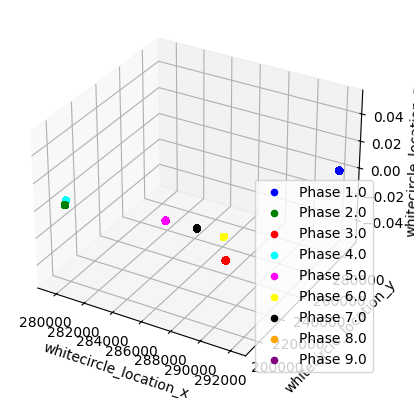

In [7]:
# 3D 시각화 시도 > 'whitecircle_location_z' 값이 0이라 2D로 전환
# 3D는 플레이어들의 z축 분석할 때 써먹을까함

phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']
for phase, color in zip(phase, colors):
    phase_data = df[df['phase'] == phase]
    ax.scatter(phase_data['whitecircle_location_x'], phase_data['whitecircle_location_y'], phase_data['whitecircle_location_z'], color=color, label=f'Phase {phase}')
    
ax.set_xlabel('whitecircle_location_x')
ax.set_ylabel('whitecircle_location_y')
ax.set_zlabel('whitecircle_location_z')
ax.legend()
plt.show()



In [8]:
# 페이즈별 반지름 변화흐름 
df.drop_duplicates(subset='phase')[['phase','whitecircle_radius']]['whitecircle_radius'].to_list()

[202901.53125,
 111595.84375,
 66957.5078125,
 40174.5078125,
 26113.4296875,
 16973.728515625,
 11032.9228515625]

In [9]:
# 페이즈 전처리 후 남은 것 체크
df.drop_duplicates(subset='phase')[['phase','whitecircle_radius']]['phase'].to_list()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

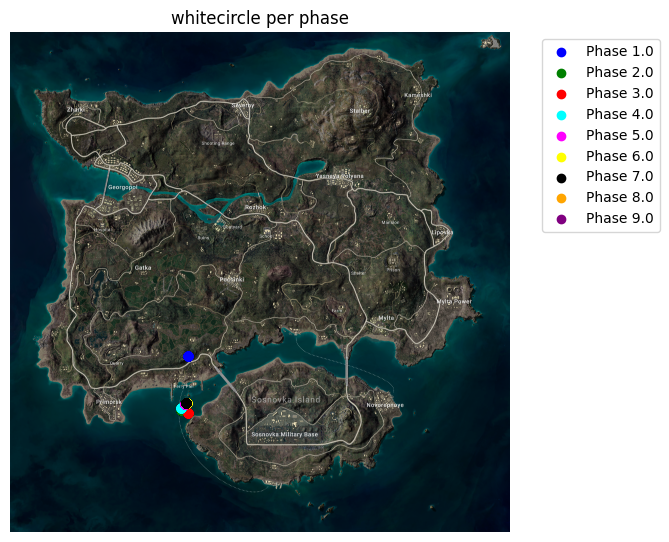

In [10]:
# 중심부 좌표찍기 - 성공
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

mapx, mapy = map_dimensions['Baltic_Main']

fig = plt.figure(figsize=(5, 5), dpi=100)

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Erangel_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, mapx, 0, mapy])

df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    plt.scatter(phase_data['whitecircle_location_x'], phase_data['whitecircle_location_y'], color=color, label=f'Phase {phase}')

plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


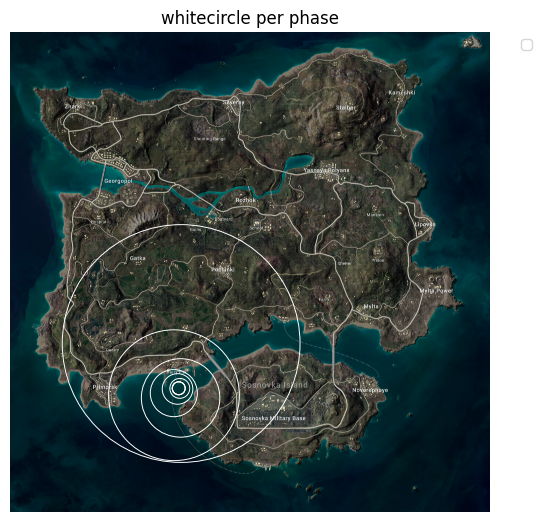

In [11]:
# 안전구역 원 그리기 - 성공
import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

mapx, mapy = map_dimensions['Baltic_Main']

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Erangel_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, mapx, 0, mapy])

df['phase_rounded'] = df['phase'].round(1)
phase = [1.0,2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

for phase in phase:
    phase_data = df[df['phase_rounded'] == phase]

    if not phase_data.empty:
      x = phase_data['whitecircle_location_x'].iloc[0]
      y = phase_data['whitecircle_location_y'].iloc[0]
      radius = phase_data['whitecircle_radius'].iloc[0]

    white_circle = plt.Circle((x,y),radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
    ax.add_patch(white_circle)

plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

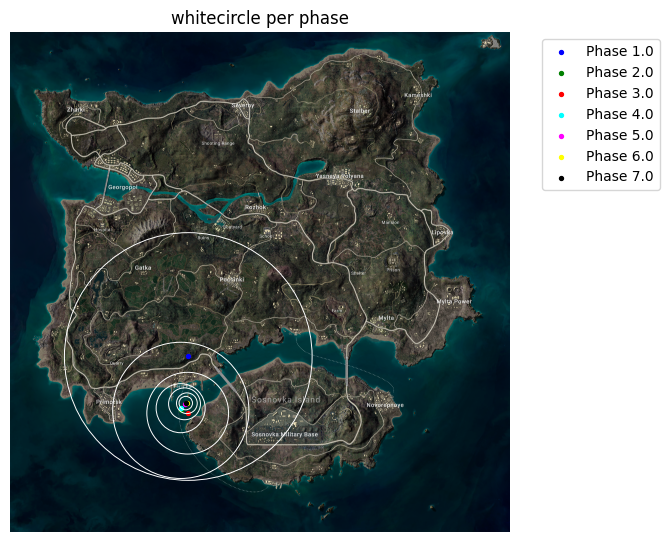

In [12]:
# 안전구역 원과 중심부 좌표 같이 표시 - 성공

import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

mapx, mapy = map_dimensions['Baltic_Main']

# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")

# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Erangel_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, 819200, 0, 819200])

# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

# 각 단계별로 중심부 표시 및 안전구역 그리기
for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]

        # 중심부 좌표 표시
        plt.scatter(x, y, color=color, label=f'Phase {phase}', s=8)

        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
        ax.add_patch(white_circle)
        
plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('whitecircle per phase')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

이동경로 시각화

In [4]:
df_team_DNW = df[df['character.name'].str.contains('DNW')]
df_team_others = df[~df['character.name'].str.contains('17')]

In [9]:
df_team_DNW.head()

_D character.name  character.location.x  character.location.y  \
16  11:39:56.687     DNW_Salute                494177                178778   
17  11:39:56.688     DNW_Salute                494076                178764   
18  11:39:56.892     DNW_Salute                494227                178785   
22  11:39:59.021     DNW_Salute                494798                178783   
27  11:40:00.231     DNW_Salute                494678                178628   

    character.location.z  character.isInBlueZone  phase  \
16                  4157                   False    1.0   
17                  4200                   False    1.0   
18                  4221                   False    1.0   
22                  4246                   False    1.0   
27                  4246                   False    1.0   

    whitecircle_location_x  whitecircle_location_y  whitecircle_radius  \
16                  292084                  287540        202901.53125   
17                  292084                  287540        202901.53125   
18                  292084                  287540        202901.53125   
22                  292084                  287540        202901.53125   
27                  292084                  287540        202901.53125   

    whitecircle_location_z  
16                       0  
17                       0  
18                       0  
22                       0  
27                       0

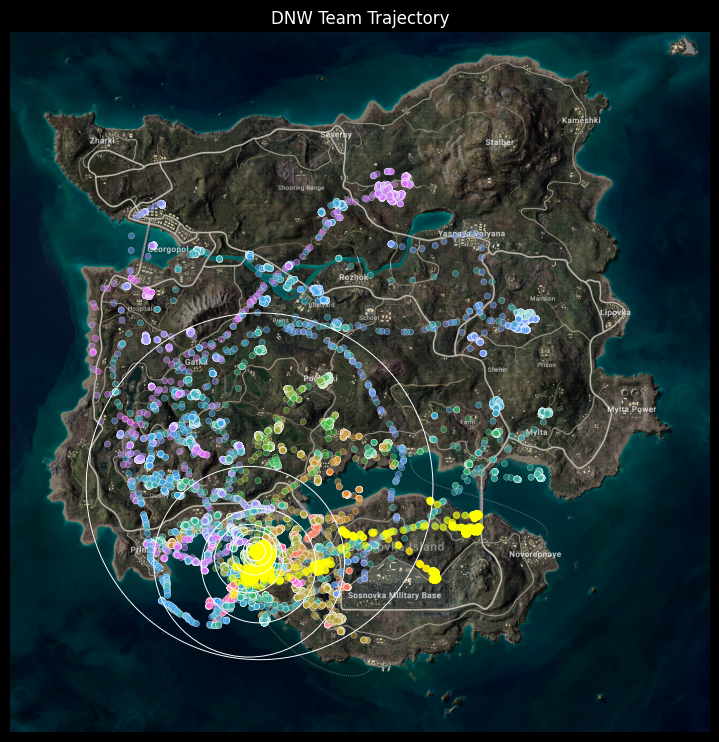

In [15]:
# scatter plot으로 Trajectory 유사표현

import matplotlib.pyplot as plt
import matplotlib.image as img
from chicken_dinner.constants import map_dimensions

mapx, mapy = map_dimensions['Baltic_Main']

# Figure 생성
fig = plt.figure(figsize=(7, 7), dpi=100)
fig.set_facecolor('black')  # 바깥 외부 배경 색을 검은색으로 설정

ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")

# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Erangel_Main_High_Res.png'
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, mapx, 0, mapy])

# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'black', 'orange', 'purple']

# 각 단계별로 중심부 표시 및 안전구역 그리기
for phase, color in zip(phase, colors):
    phase_data = df[df['phase_rounded'] == phase]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]

        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor="w", linewidth=0.7, fill=False, zorder=5)
        ax.add_patch(white_circle)

# scatterplot을 활용해 맵 상의 선수들 위치를 heatmap 처럼 표시하여 분포도 관찰, 시간에 따른 위치가 다수 있어 trajectory로 볼수 있을듯함
sns.scatterplot(x='character.location.x', y='character.location.y', hue='character.name', data=df, s=20, alpha=0.5)

# DNW 팀의 이동 궤적 그리기
for _, team_row in df_team_DNW.iterrows():
    x = team_row['character.location.x']
    y = team_row['character.location.y']
    ax.scatter(x, y, color='yellow', s=20,alpha=0.5)  # 각 위치를 점으로 표시

plt.legend().set_visible(False)
plt.xlabel('whitecircle_location_x')
plt.ylabel('whitecircle_location_y')
plt.title('DNW Team Trajectory', color='w')
plt.grid(True)

output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\DNW Team Trajacotry.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()

In [13]:
!pip install Pillow
!pip install ffmpeg

In [18]:
df['character.name'].unique()

array(['GEN_Seongjang', 'V7_Glaz', 'V7_Gyumin', 'GEN_Pio', 'DNW_Salute',
       'PeRo_Summer', 'V7_Heaven', 'V7_Tosi', 'T5_Pathompong',
       'TWIS_BatulinS', 'TWIS_spyrro', 'GEN_Esther', 'PeRo_Ming',
       'PeRo_Aixleft', 'Tian_77owo', 'GEN_DG98', '17_SuJiu',
       'T5_RossitedJR', '17_Lilghost', 'DNW_Loki', '17_xwudd',
       'DNW_Inonix', 'TWIS_Lu', '17_Xbei', 'SSG_PaG3', 'Tian_PaoPao',
       'TWIS_Perfect1ks', 'SQ_hwinn', 'T5_Thanad0l', 'Tian_LinShu23',
       'SSG_Sharpshot4K', 'NH_CC108', 'SSG_Roth', 'Tian_Zyy',
       'FaZe_jeemzz', 'DAY_PuuChiwz', 'SQ_Kickstart', 'NH_Nannnnn',
       'DNW_seoul', 'SSG_PiXeL1K', 'TL_Shen', 'T5_Hatsawat', 'NH_Dec12th',
       'NH_MMing', 'FaZe_curexi', 'FaZe_Fexx', 'DAY_Belmoth', 'SQ_TGLTN',
       'SQ_Shrimzy', 'DAY_Nourinz', 'TL_ATongMuu', 'TL_Lzqq',
       'TL_Jiaoyang', 'DAY_Flash', 'LG_Fludd', 'LG_M1ME', 'LG_Relo',
       'LG_Snakers', 'CES_Himass', 'CES_HaiSaki', 'CES_Sololzy',
       'CES_Taikonn', 'FaZe_Gustav', 'PeRo_Cui71'], dtype=o

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from chicken_dinner.constants import map_dimensions
import seaborn as sns
mapx, mapy = map_dimensions['Baltic_Main']
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Erangel_Main_High_Res.png'
# Figure 생성
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
fig.set_facecolor('black')
ax.axis('off')
# 이미지 로드 및 설정
img = mpimg.imread(img_path)
ax.imshow(img, extent=[0, mapx, 0, mapy])
# 안전구역 및 초기 선수 위치 scatterplot 설정
def setup_plot():
    df['phase_rounded'] = df['phase'].round(1)
    phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple']
    for p, color in zip(phase, colors):
        phase_data = df[df['phase_rounded'] == p]
        if not phase_data.empty:
            x = phase_data['whitecircle_location_x'].iloc[0]
            y = phase_data['whitecircle_location_y'].iloc[0]
            radius = phase_data['whitecircle_radius'].iloc[0]
            white_circle = plt.Circle((x, y), radius, edgecolor=color, linewidth=0.7, fill=False, zorder=5)
            ax.add_patch(white_circle)
    sns.scatterplot(x='character.location.x', y='character.location.y', hue='character.name', data=df, s=20, alpha=0.5)
# DNW 팀의 이동 궤적을 그리기 위한 업데이트 함수
def update(num):
    team_data = df_team_DNW.iloc[:num+1]
    ax.scatter(team_data['character.location.x'], team_data['character.location.y'], color='yellow', s=20, alpha=0.5)
    return ax,
# 초기 플롯 설정
setup_plot()
# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(df_team_DNW), repeat=False)
# GIF 저장
output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\DNW_Team_Trajectory_Animation.gif'
ani.save(output_path, writer='imagemagick', fps=10)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


애니메이션 GIF 파일이 성공적으로 생성되었습니다: C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.gif


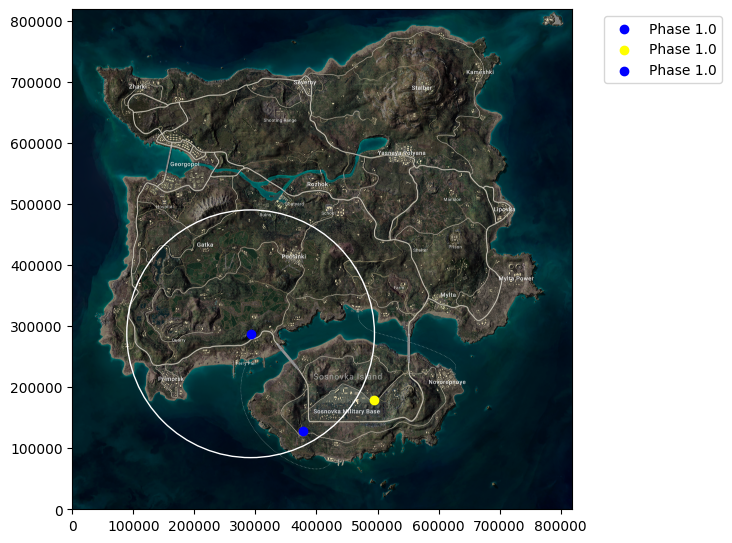

In [20]:
# 중심부 좌표와 안전구역 그리고 애니메이션화 - gif만 성공

mapx, mapy = map_dimensions['Baltic_Main']


# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Erangel_Main_High_Res.png'
base_img = mpimg.imread(img_path)

# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")

# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

def draw_phase(i):
    ax.clear()
    ax.imshow(base_img, extent=[0, mapx, 0, mapy])
    phase_data = df[df['phase_rounded'] == phase[i]]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]

        # 중심부 좌표 표시 및 레이블 할당
        ax.scatter(x, y, color=colors[i], label=f'Phase {phase[i]}')
        
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor='white', linewidth=1, fill=False)
        ax.add_patch(white_circle)

        # DNW 팀 그리기
        x2 = df_team_DNW['character.location.x'].iloc[0]
        y2 = df_team_DNW['character.location.y'].iloc[0]
        ax.scatter(x2, y2, color='yellow', marker='o',label=f'Phase {phase[i]}')

        # 다른 팀 그리기
        x3 = df_team_others['character.location.x'].iloc[0]
        y3= df_team_others['character.location.y'].iloc[0]
        ax.scatter(x3, y3, color='blue', marker='o',label=f'Phase {phase[i]}')

    # ax.set_xlabel('whitecircle_location_x')
    # ax.set_ylabel('whitecircle_location_y')
    # ax.set_title('whitecircle per phase')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 애니메이션 생성
ani = animation.FuncAnimation(fig, draw_phase, frames=len(phase), repeat=True)

# GIF 형식으로 저장
gif_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.gif'

ani.save(gif_path, writer=PillowWriter(fps=2))

# GIF 파일 생성 확인
if os.path.exists(gif_path):
    print(f"애니메이션 GIF 파일이 성공적으로 생성되었습니다: {gif_path}")
else:
    print("애니메이션 GIF 파일 생성에 실패했습니다.")

MovieWriter ffmpeg unavailable; using Pillow instead.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: unknown file extension: .mp4

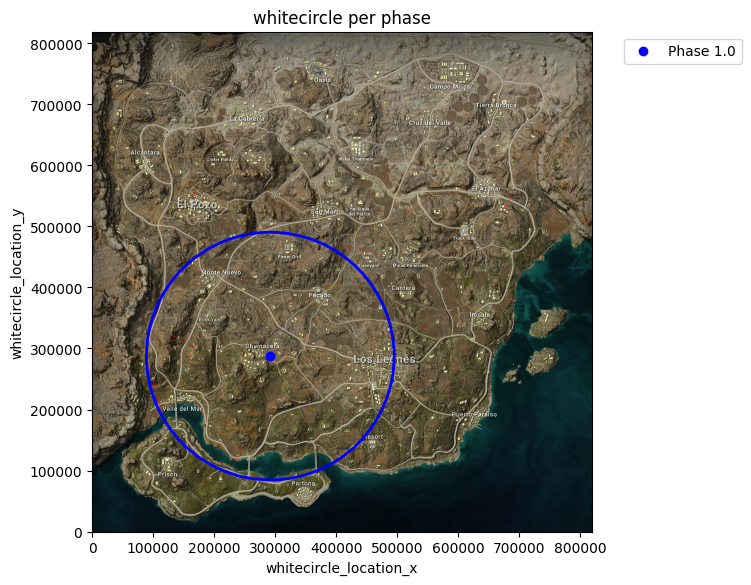

In [15]:
# 중심부 좌표와 안전구역 그리고 애니메이션화 - mp4로도 같이 뽑기 > 오류발생하여 추후 시각화 중점할 때 다룰 예정

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import PillowWriter
import pandas as pd

# 이미지 로드
img_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\map_image\Miramar_Main_High_Res.png'
base_img = mpimg.imread(img_path)
# Figure 생성
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")
# 데이터 전처리
df['phase_rounded'] = df['phase'].round(1)
phase = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

def draw_phase(i):
    ax.clear()
    ax.imshow(base_img, extent=[0, 819200, 0, 819200])
    phase_data = df[df['phase_rounded'] == phase[i]]
    if not phase_data.empty:
        x = phase_data['whitecircle_location_x'].iloc[0]
        y = phase_data['whitecircle_location_y'].iloc[0]
        radius = phase_data['whitecircle_radius'].iloc[0]
        # 중심부 좌표 표시 및 레이블 할당
        ax.scatter(x, y, color=colors[i], label=f'Phase {phase[i]}')
        # 안전구역 그리기
        white_circle = plt.Circle((x, y), radius, edgecolor=colors[i], linewidth=2, fill=False)
        ax.add_patch(white_circle)
    ax.set_xlabel('whitecircle_location_x')
    ax.set_ylabel('whitecircle_location_y')
    ax.set_title('whitecircle per phase')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 애니메이션 생성
ani = animation.FuncAnimation(fig, draw_phase, frames=len(phase), repeat=True)

# MP4 형식으로 애니메이션 저장
mp4_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.mp4'
ani.save(mp4_path, writer='ffmpeg', fps=20)

# GIF 형식으로도 저장
gif_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\animation.gif'
ani.save(gif_path, writer=PillowWriter(fps=20))

# 파일 생성 확인
if os.path.exists(mp4_path):
    print(f"애니메이션 MP4 파일이 성공적으로 생성되었습니다: {mp4_path}")
else:
    print("애니메이션 MP4 파일 생성에 실패했습니다.")
if os.path.exists(gif_path):
    print(f"애니메이션 GIF 파일이 성공적으로 생성되었습니다: {gif_path}")
else:
    print("애니메이션 GIF 파일 생성에 실패했습니다.")